In [1]:
#using Pkg
using Plots
using DelimitedFiles
using Dierckx
include("../src/MurcaReductionNumerical.jl")
include("../src/MurcaReductionFit.jl")
using .MurcaReductionNumerical
using .MurcaReductionFit

In [2]:
pyplot()

Plots.PyPlotBackend()

# Only proton superfluidity

In [3]:
vs = 0.0:0.1:10
n = 5
list_In_SFp = [In_SFp(vp, n) for vp in vs]
list_In_SFp_fit = In_SFp_fit.(vs);

In [4]:
list_Ip_SFp = [Ip_SFp(vp, n) for vp in vs]
list_Ip_SFp_fit = Ip_SFp_fit.(vs);

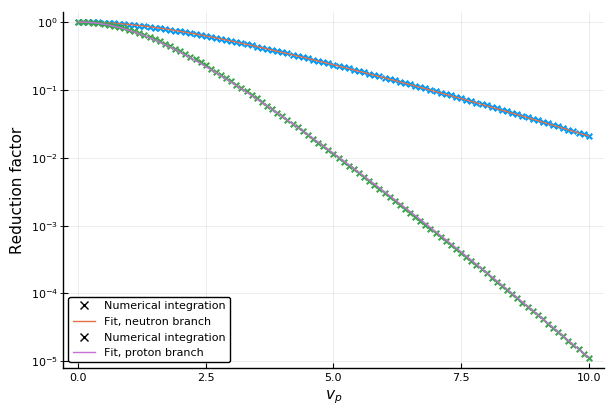

In [5]:
scatter(vs, list_In_SFp, yscale=:log10, label="Numerical integration", m=(4, :x))
plot!(vs, list_In_SFp_fit, yscale=:log10, label="Fit, neutron branch")

scatter!(vs, list_Ip_SFp, yscale=:log10, label="Numerical integration", m=(4, :x))
plot!(vs, list_Ip_SFp_fit, yscale=:log10, label="Fit, proton branch", legend=:bottomleft)

ylabel!("Reduction factor")
xlabel!("\$v_p\$")
#savefig("murca_reduction_SFp_log.pdf")

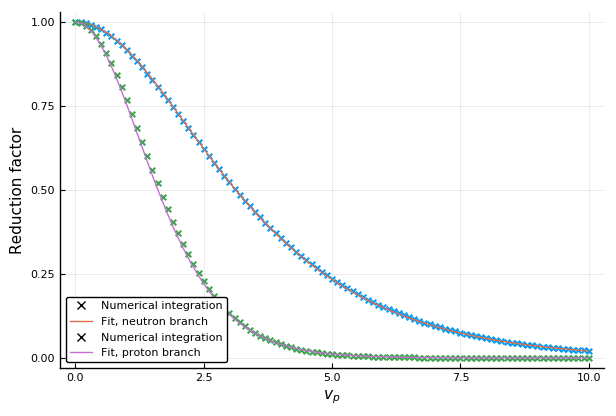

In [6]:
scatter(vs, list_In_SFp, label="Numerical integration", m=(4, :x))
plot!(vs, list_In_SFp_fit, label="Fit, neutron branch")

scatter!(vs, list_Ip_SFp, label="Numerical integration", m=(4, :x))
plot!(vs, list_Ip_SFp_fit, label="Fit, proton branch", legend=:bottomleft)

ylabel!("Reduction factor")
xlabel!("\$v_p\$")

#savefig("murca_reduction_SFp_lin.pdf")

# Only neutron superfluidity

In [ ]:
"""
The code below takes a bit long time
"""

#vns = 0.0:0.5:10
#list_In_SFn = [In_SFn(vn, n, 0.01, 0.1) for vn in vns];
#list_Ip_SFn = [Ip_SFn(vn, n, 0.01) for vn in vns];

In [7]:
# We import already calculated ones
list_In_SFn = readdlm("../output_data/list_In_SFn.dat", ' ', Float64, '\n', comments=true);
list_Ip_SFn = readdlm("../output_data/list_Ip_SFn.dat", ' ', Float64, '\n', comments=true);

In [8]:
tns = 1.0:-0.01:0.0001
vB(t) = sqrt(1-t)*(0.7893 + 1.188/t)
vBs = vB.(tns)
list_In_SFn_fit = In_SFn_fit.(tns)
list_In_SFn_asympt = In_SFn_asympt.(tns);

In [9]:
list_Ip_SFn_fit = Ip_SFn_fit.(vs);

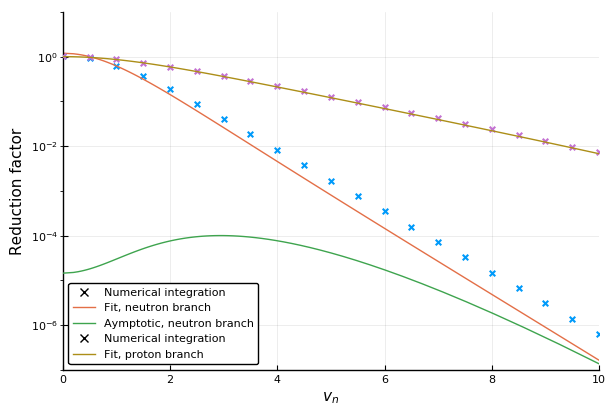

In [10]:
scatter(list_In_SFn[:,1], list_In_SFn[:,2], label="Numerical integration", m=(4, :x))
plot!(vBs, list_In_SFn_fit, yscale=:log10, label="Fit, neutron branch", legend=:bottomleft)
plot!(vBs, list_In_SFn_asympt, yscale=:log10, label="Aymptotic, neutron branch", legend=:bottomleft)
scatter!(list_Ip_SFn[:,1], list_Ip_SFn[:,2], label="Numerical integration", m=(4, :x))
plot!(vs, list_Ip_SFn_fit, yscale=:log10, label="Fit, proton branch", legend=:bottomleft)
xlims!(0,10)
ylims!(1e-7,10)
ylabel!("Reduction factor")
xlabel!("\$v_n\$")
#savefig("murca_reduction_SFn_log.pdf")

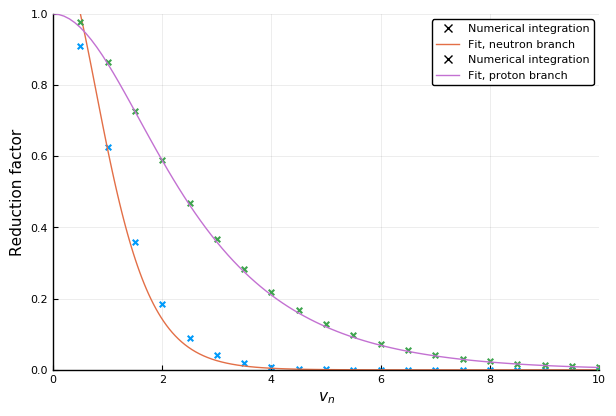

In [11]:
scatter(list_In_SFn[:,1], list_In_SFn[:,2], label="Numerical integration", m=(4, :x))
plot!(vBs, list_In_SFn_fit, label="Fit, neutron branch", legend=:bottomleft)
#plot!(vBs, list_In_SFn_asympt, label="Aymptotic, neutron branch", legend=:bottomleft)
scatter!(list_Ip_SFn[:,1], list_Ip_SFn[:,2], label="Numerical integration", m=(4, :x))
plot!(vs, list_Ip_SFn_fit, label="Fit, proton branch", legend=:topright)
xlims!(0,10)
ylims!(0,1)
ylabel!("Reduction factor")
xlabel!("\$v_n\$")
#savefig("murca_reduction_SFn_lin.pdf")

# Both proton and neutron superfluidity

In [ ]:
"""
The code below takes a bit long time
"""
#vs = 0.0:0.5:5.0
#n=5
#list_Ip_SFnp = [Ip_SFnp(vn, vp, n, 0.001) for vn=vs, vp=vs];
#list_In_SFnp = [In_SFnp(vn, vp, n, 0.01, 0.1) for vn=vs, vp=vs];

In [96]:
# We import already calculated ones; 21 points for both vn and vp
list_In_SFnp = readdlm("../output_data/list_In_SFnp.dat", ' ', Float64, '\n', comments=true);
matsize = 21
vs = [list_In_SFnp[21*i,1] for i in 1:matsize]
mat_In_SFnp = reshape(list_In_SFnp[:,3], matsize, matsize);

In [97]:
list_In_SFnp_fit = transpose([In_SFnp_fit(vn, vp) for vn=vs, vp=vs]);

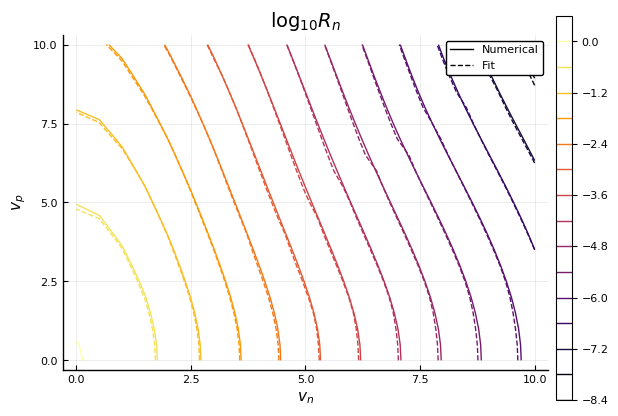

In [99]:
contour(vs, vs, log10.(mat_In_SFnp))
contour!(vs, vs, log10.(list_In_SFnp_fit), linestyle=:dash)
plot!([], [], color=:black, linestyle=:solid, label="Numerical", legend=:topright)
plot!([], [], color=:black, linestyle=:dash, label="Fit", legend=:topright)
title!("\$\\log_{10} R_n\$")
ylabel!("\$v_p\$")
xlabel!("\$v_n\$")
#savefig("murca_reduction_nbr_SFnp.pdf")

In [100]:
list_Ip_SFnp = readdlm("../output_data/list_Ip_SFnp.dat", ' ', Float64, '\n', comments=true);
matsize = 21
vs = [list_Ip_SFnp[21*i,1] for i in 1:matsize]
mat_Ip_SFnp = reshape(list_Ip_SFnp[:,3], matsize, matsize);

In [101]:
list_Ip_SFnp_fit = transpose([Ip_SFnp_fit(vn, vp) for vn=vs, vp=vs]);

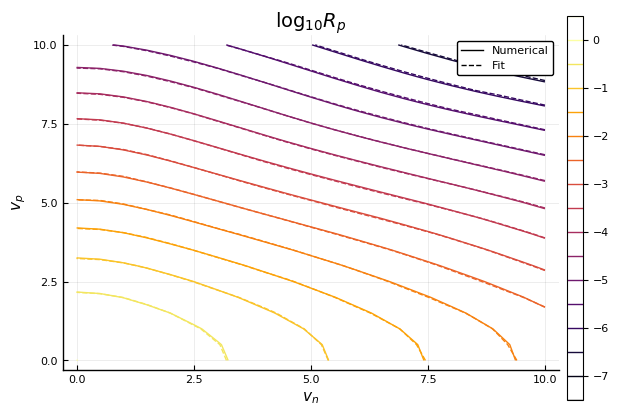

In [102]:
contour(vs, vs, log10.(mat_Ip_SFnp))
contour!(vs, vs, log10.(list_Ip_SFnp_fit), linestyle=:dash)
plot!([], [], color=:black, linestyle=:solid, label="Numerical", legend=:topright)
plot!([], [], color=:black, linestyle=:dash, label="Fit", legend=:topright)
title!("\$\\log_{10} R_p\$")
ylabel!("\$v_p\$")
xlabel!("\$v_n\$")
savefig("murca_reduction_pbr_SFnp.pdf")